## **Importing Packages**

In [2]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.color import rgba2rgb
from PIL import Image

## **Loading ResNet50 Model**

In [3]:
weights = torchvision.models.segmentation.FCN_ResNet50_Weights.DEFAULT
model = torchvision.models.segmentation.fcn_resnet50(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

## **Applying Transforms To Test Set**

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    
])
trans = transforms.Compose(
    [
        transforms.PILToTensor(),
    ]
)

## **Loading Dataset Using VOCSegmentation**

In [5]:
dataset1 = torchvision.datasets.VOCSegmentation('./',year = '2007',image_set = 'test',download = True,transform = transform, target_transform = trans)
loader = DataLoader(dataset1,batch_size = 1, shuffle = False)

  0%|          | 0/451020800 [00:00<?, ?it/s]

Extracting ./VOCtest_06-Nov-2007.tar to ./


### Finding IOU for each Image

In [6]:
def find_iou(pred, target, num_classes):
    ious = []
    for class_id in range(num_classes):
        intersection = (pred == class_id) & (target == class_id)
        union = (pred == class_id) | (target == class_id)
        if union.sum()!=0:
          iou = intersection.sum() / union.sum()
          ious.append(iou)
        if union.sum == 0:
          ious.append(1)  
    return np.mean(ious)

In [7]:
def ReplaceValue(ten, a, b):
    ten[ten == a] = b
    
    return ten

### **Testing**

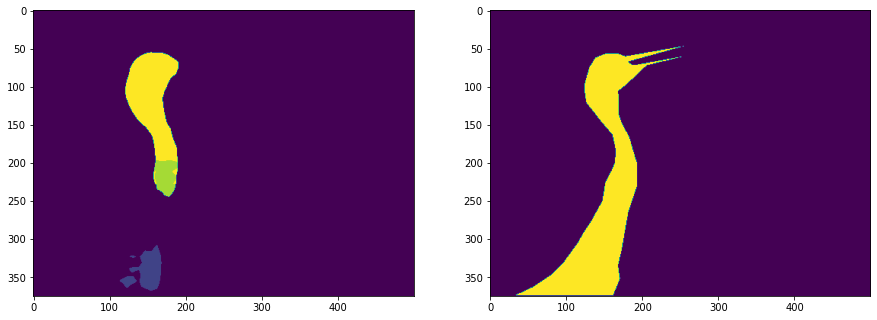

Pixel Accuracy : 0.9172693333333334
IOU :0.2622424247071096


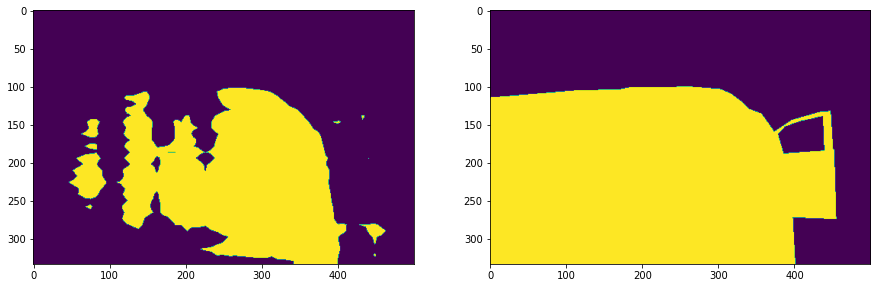

Pixel Accuracy : 0.7228168168168169
IOU :0.3732653175652929


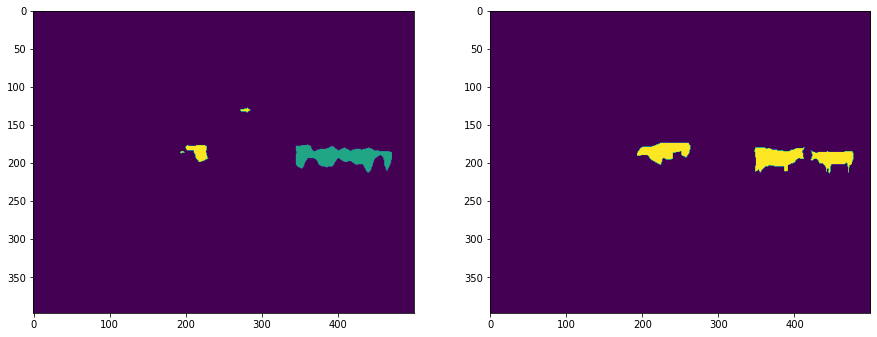

Pixel Accuracy : 0.9873047858942066
IOU :0.46558365841656907


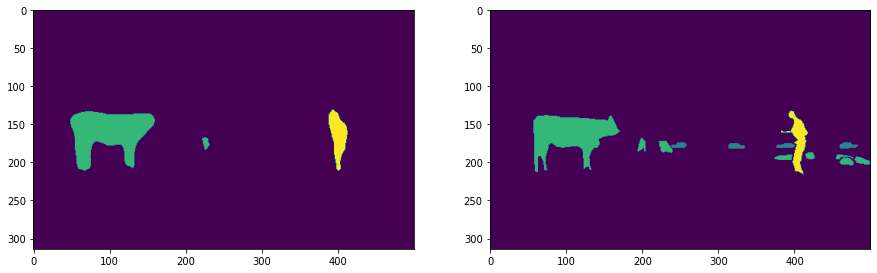

Pixel Accuracy : 0.9773121019108281
IOU :0.526824445234054


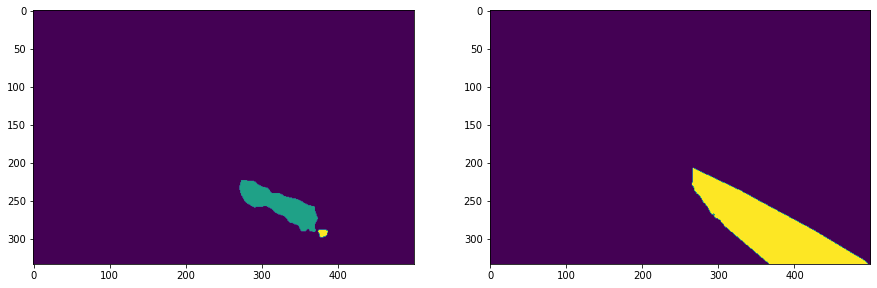

Pixel Accuracy : 0.9521981981981982
IOU :0.40704547465051183


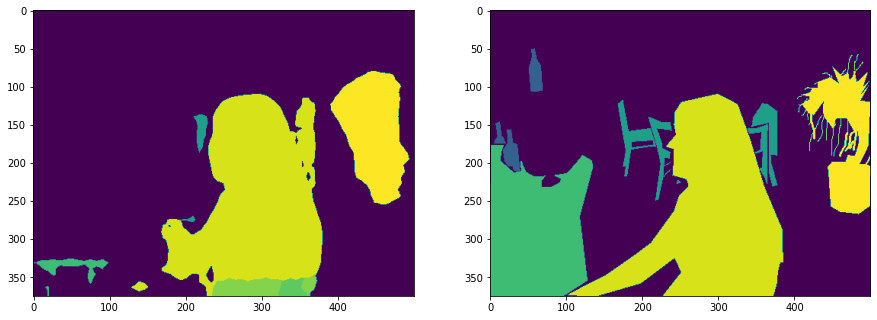

Pixel Accuracy : 0.773152
IOU :0.2547282482389319


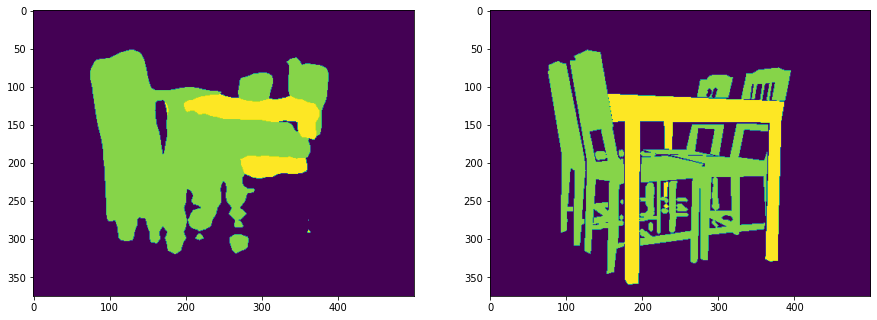

Pixel Accuracy : 0.8315626666666667
IOU :0.528971268141338


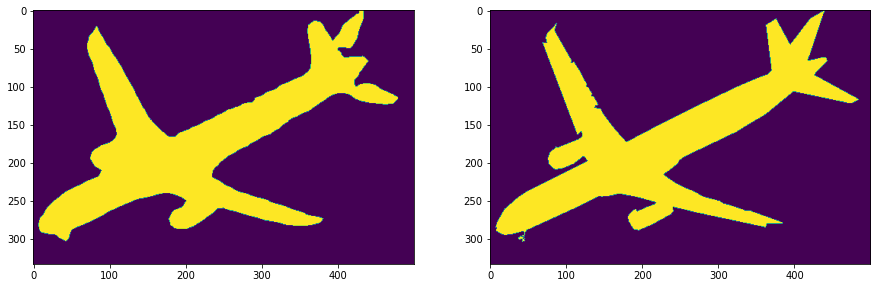

Pixel Accuracy : 0.9708828828828829
IOU :0.9250559892709295


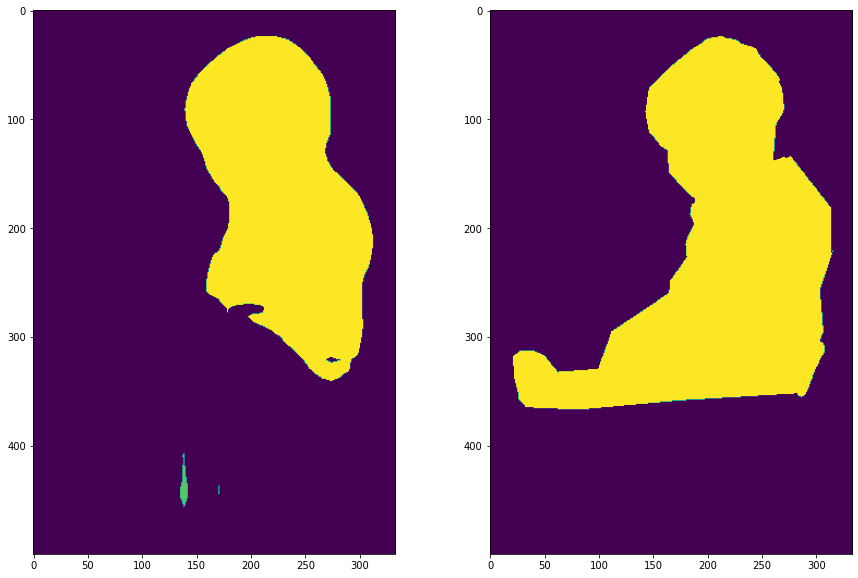

Pixel Accuracy : 0.8904984984984985
IOU :0.502704201005784


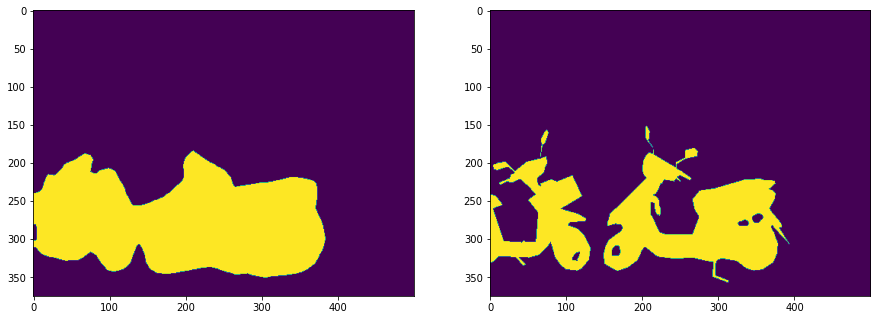

Pixel Accuracy : 0.909824
IOU :0.7588764459016251


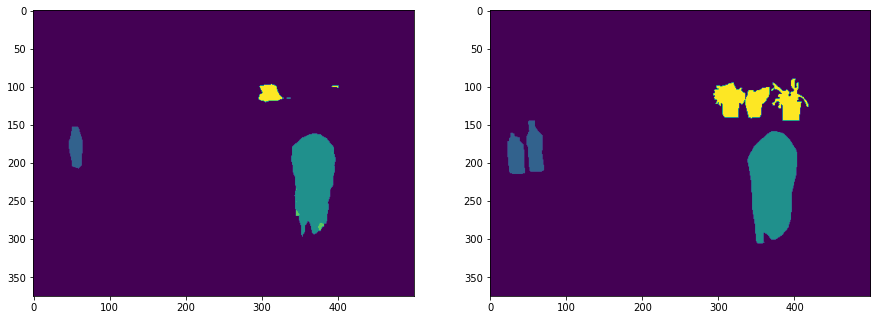

Pixel Accuracy : 0.9681226666666667
IOU :0.3702928703225661


In [10]:
outputs = []
ground_truths = []
pixelaccuracy = []
Iou =[]
for i, (images, masks) in enumerate(loader):
  with torch.no_grad():
    #img = np.array(images)
    #img = transform(images)
    out = model(images)
    
   
    output = (out['out'].squeeze()).argmax(0).numpy()
    
    #print(masks.shape)
    #print(masks.shape)
    #print(np.max(m))
    m = torch.squeeze(masks).numpy()
    #m = m*255
    #np.round(m)
    
    m = ReplaceValue(m, 255, 0) 
    
    #print(np.max(output))
    
    iou = find_iou(output,m,21)
    #print(iou)
    
    outputs.append(output)
    ground_truths.append(m)
    pixelaccuracy.append(np.mean(m==output))
    
    Iou.append(iou)
  

    
    if(i%20 == 0):
        plt.figure(figsize=(15,10))
        
        plt.subplot(1,2,1)
        plt.imshow(output)
        plt.subplot(1,2,2)
        plt.imshow(m)
        plt.show()
        print("Pixel Accuracy : "+str(pixelaccuracy[i]))
        print("IOU :"+str(iou))
      
    
    
     
   


    

## **Iou and Pixel Accuracy**

In [9]:
print("Mean Pixel Accuracy : "+str(np.sum(pixelaccuracy)/len(pixelaccuracy)*100))  
print("Mean IoU :" +str(np.sum(Iou)/len(Iou)*100)) 

Mean Pixel Accuracy : 88.97778554920318
Mean IoU :56.09677706915674
